<a href="https://colab.research.google.com/github/623020514-5/multivariate/blob/main/Chapter5_Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.datacamp.com/community/tutorials/introduction-factor-analysis?fbclid=IwAR1r7DMXKvnMr-keVwlp7FtSSnxsj01HkhPANfLBF3WFTFo-YEdl8isAU80



**Assumtion**

In [1]:
import pandas as pd #เรียกใช้เเพนด้า

In [2]:
BFI_data = pd.read_csv('/content/bfi.csv') #copy path csv ตรงๆ
BFI_data.head() #show data

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


ซึงข้อมูลข้างต้นที่ได้มาจะเป็นข้อมูลที่ได้จากแบบสอบถาม จะเป็นคะเเนนจากแบบทดสอบ Unname คือ รหัส เช่น รหัสนักศึกษา or primary key

**Factor Analysis**

Assumtion: ในข้อมูล multivariate ที่มีตัวแปร observe variables จำนวน n ตัว 

มีตัวแปร Factor(latent Variables) จำนวน k ตัว ที่สามารถอธิบายข้อมูลทั้งหมดได้ โดย K < n

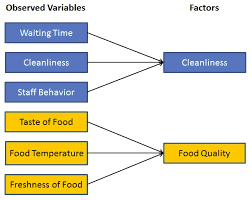

# Assumptions ในการทำ Factor Analysis:

* There are no outliers in data.

* Sample size should be greater than the factor.

* There should not be perfect **multicollinearity**.

* There should not be **homoscedasticity** between the variables.

**homoscedasticity** คือ ค่าความคลาดเคลื่อนจะเท่ากันตลอดทั้งเส้นทาง

ภาวะร่วมเส้นตรงหลายตัวแปรที่สมบูรณ์ (Perfect Multicollinearity)

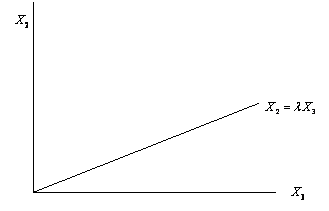